# Locate Axis with no values

In [36]:
from types import SimpleNamespace
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=1)

import pandas as pd
import seaborn as sns

raw_data = pd.read_csv('input/diabetes.csv')

xFactor = 'BloodPressure'
yFactor = 'BMI'

# Make a copy/dataset
data = raw_data.copy()
print(data.loc[(data[xFactor]<0.1)].index)

Index([9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706], dtype='int64')


# Predict Bloodpressure based on BMI

     BloodPressure   BMI
234             68  29.7
297             84  30.7
303             98  52.9
4/4 [==============================] - 0s 691us/step


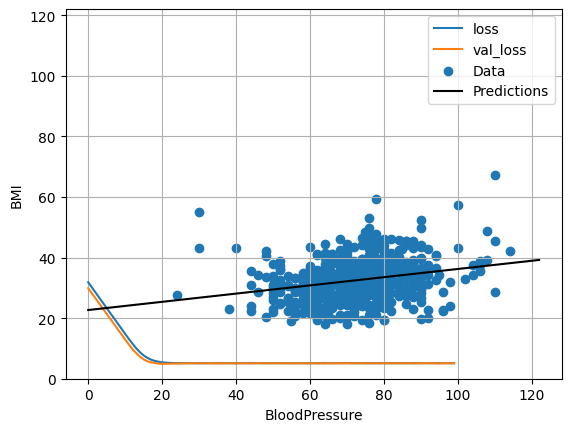

In [58]:
from types import SimpleNamespace
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=1)

import pandas as pd
import seaborn as sns

raw_data = pd.read_csv('input/diabetes.csv')

# What columns are we interested in?
xFactor = 'BloodPressure'
yFactor = 'BMI'

# Drop the unused columns
raw_data = raw_data[[xFactor,yFactor]]
print(raw_data.sample(n=3))

# Make a copy/dataset
data = raw_data.copy()
# Strip out values of 0, as these are likley missing data points
data.drop(data.loc[(data[xFactor]<0.1) | (data[yFactor]<0.1)].index,inplace=True)

# Namespace everything
n_model = {'data':None,'features':None,'labels':None, 'predictions':None}
train = SimpleNamespace(**n_model)
test = SimpleNamespace(**n_model)

# Set namespace members
train.data = data.sample(frac=0.9,random_state=0)
test.data = data.drop(train.data.index)
train.features = train.data.copy()
test.features = test.data.copy()
train.labels = train.features.pop(yFactor)
test.labels = test.features.pop(yFactor)

# Make and train the model
x_as_array = np.array(train.features[xFactor])
x_normalizer = layers.Normalization(input_shape=[1,], axis=None)
x_normalizer.adapt(x_as_array)
x_model = tf.keras.Sequential([
    x_normalizer,
    layers.Dense(units=1)
])
x_model.compile(
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history = x_model.fit(
    train.features[xFactor],
    train.labels,
    epochs=100,
    verbose=0,
    validation_split=0.2)

# Record and Plot Loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, data.max()[xFactor]])
    plt.xlabel('Epoch')
    plt.ylabel(f'Error [{xFactor}]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

# Run the test data against the model
test_results={}
test_results['x_model'] = x_model.evaluate(
    test.features[xFactor],
    test.labels, verbose=0)

# Graph the correlation and predictions
x = tf.linspace(0.0,data.max()[xFactor],data.max()[xFactor]+1)
y = x_model.predict(x)
test.predictions = y

def plot_on_graph(x, y):
  plt.scatter(train.features[xFactor], train.labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel(xFactor)
  plt.ylabel(yFactor)
  plt.legend()

plot_on_graph(x, y)